# Non-Dominated Sorting Genetic Algorithm

In [5]:
import numpy as np
import pygmo as pg
from tqdm import tqdm
from matplotlib import pyplot as plt
from IPython.display import clear_output
from modules.plotter import print_result, plot_fitness_improvement
from modules.golomb_problem import orbital_golomb_array, init_simple_problem, init_medium_problem, compute_unique_distances_and_sats_in_grid

In [6]:
N_ITERATION = 8
VARIANTS = [i for i in range(1, 19)] # all

def get_n_iteration(n_sats: int, force_golomb : bool = False):
    if force_golomb :
        return int(n_sats * 6 * 10 * 1.5)
    return n_sats * 6 * 10 

def get_population_size(n_sats: int):
    return n_sats * 6 *4

def plot_pareto_front(pareto_fitness):
    """
    Visualizza il fronte di Pareto in 3D per i primi 3 obiettivi.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        pareto_fitness[:, 0], pareto_fitness[:, 1], pareto_fitness[:, 2],
        c='blue', marker='o', label="Fronte di Pareto"
    )

    ax.set_title("Fronte di Pareto: Fitness 1 vs Fitness 2 vs Fitness 3")
    ax.set_xlabel("Fitness 1")
    ax.set_ylabel("Fitness 2")
    ax.set_zlabel("Fitness 3")
    plt.legend()
    plt.show()

def get_best_solution(pareto_fitness, pareto_vectors):
    """
    Restituisce la soluzione più vicina alla soluzione ideale.
    """
    ideal_solution = np.array([0]*len(pareto_fitness[0]))
    distances = np.linalg.norm(pareto_fitness - ideal_solution, axis=1)
    best_idx = np.argmin(distances)
    return pareto_vectors[best_idx], pareto_fitness[best_idx]

def optimize_and_plot(problem: pg.problem, algo: pg.algorithm):
    algo.set_verbosity(2)
    udp = problem.extract(orbital_golomb_array)
    solutions_log, fitness_log = [], []
    
    for _ in tqdm(range(N_ITERATION)):
        
        evolve = algo.evolve(
            pg.population(
                problem, 
                size=get_population_size(udp.n_sat)
            )
        )
        clear_output()

        evolve_f= evolve.get_f()
        evolve_x=evolve.get_x()
        best_solution, _ = get_best_solution(evolve_f,evolve_x)
        
        solutions_log.append(best_solution)
        fitness = [log[2] for log in algo.extract(pg.nsga2).get_log()]
        fitness_log.append(fitness)
    overall_avg_fitness = np.mean(fitness_log, axis=0)
    
    udp_tmp = None 
    if udp.n_sat == 5:
        udp_tmp = init_simple_problem()
    else:
        udp_tmp = init_medium_problem()
    Best_sol = []
    for x in solutions_log :
        Best_sol.append(udp_tmp.fitness(x)[0]) 
    plot_pareto_front(np.array(fitness_log[Best_sol.index(min(Best_sol))]))

    plot_fitness_improvement(overall_avg_fitness)
    print_result(udp, solutions_log, show_simulated_reconstruction=True)
    return solutions_log

# Simple Problem

## Stock

100%|██████████| 8/8 [02:36<00:00, 19.61s/it]


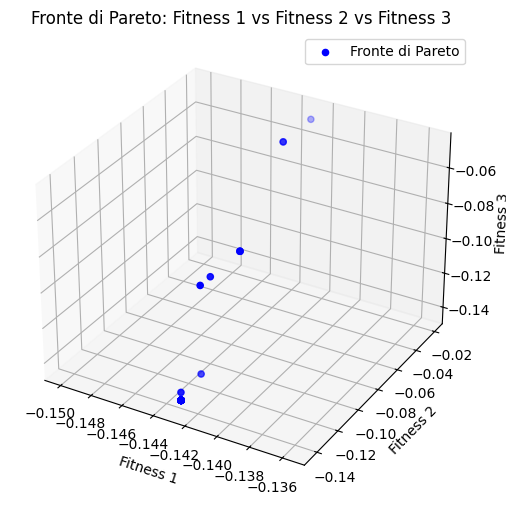

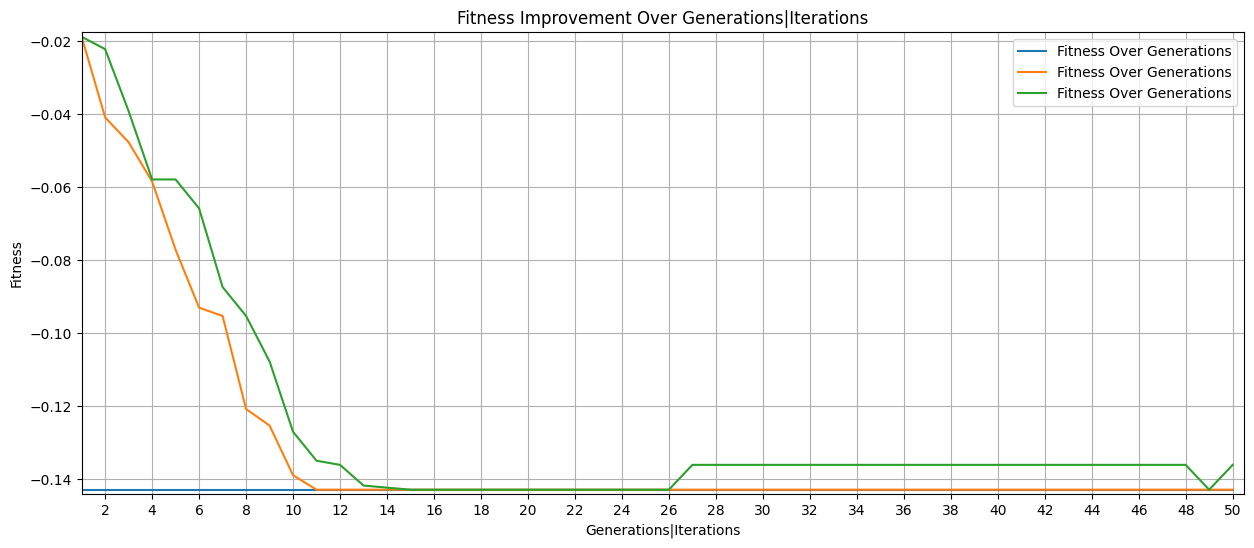

N sat:  5 	Grid size:  11
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -0.1428571	Unique Distances [%]: 35.9722	Satellites in Grid [%]: 99.1667
--- --- ---
Best solution: [ 0.33674037 -0.05172389  0.11732806 -0.28855604 -0.29705912  0.29809606
  0.0177948  -0.52928176  0.19298781 -0.39450001  0.34051203  0.095532
 -0.73206869 -0.39565668  0.61136353  0.61162937 -0.14775932 -0.84087254
 -0.36996176  0.3554129   0.81957994 -0.1662276   0.30337569 -0.72603394
 -0.45167857 -0.03985633  0.53850131  0.85607637 -0.90484184 -0.3658747 ]
Default Fitness: -0.1428571	Unique Distances [%]: 21.1111	Satellites in Grid [%]: 93.3333


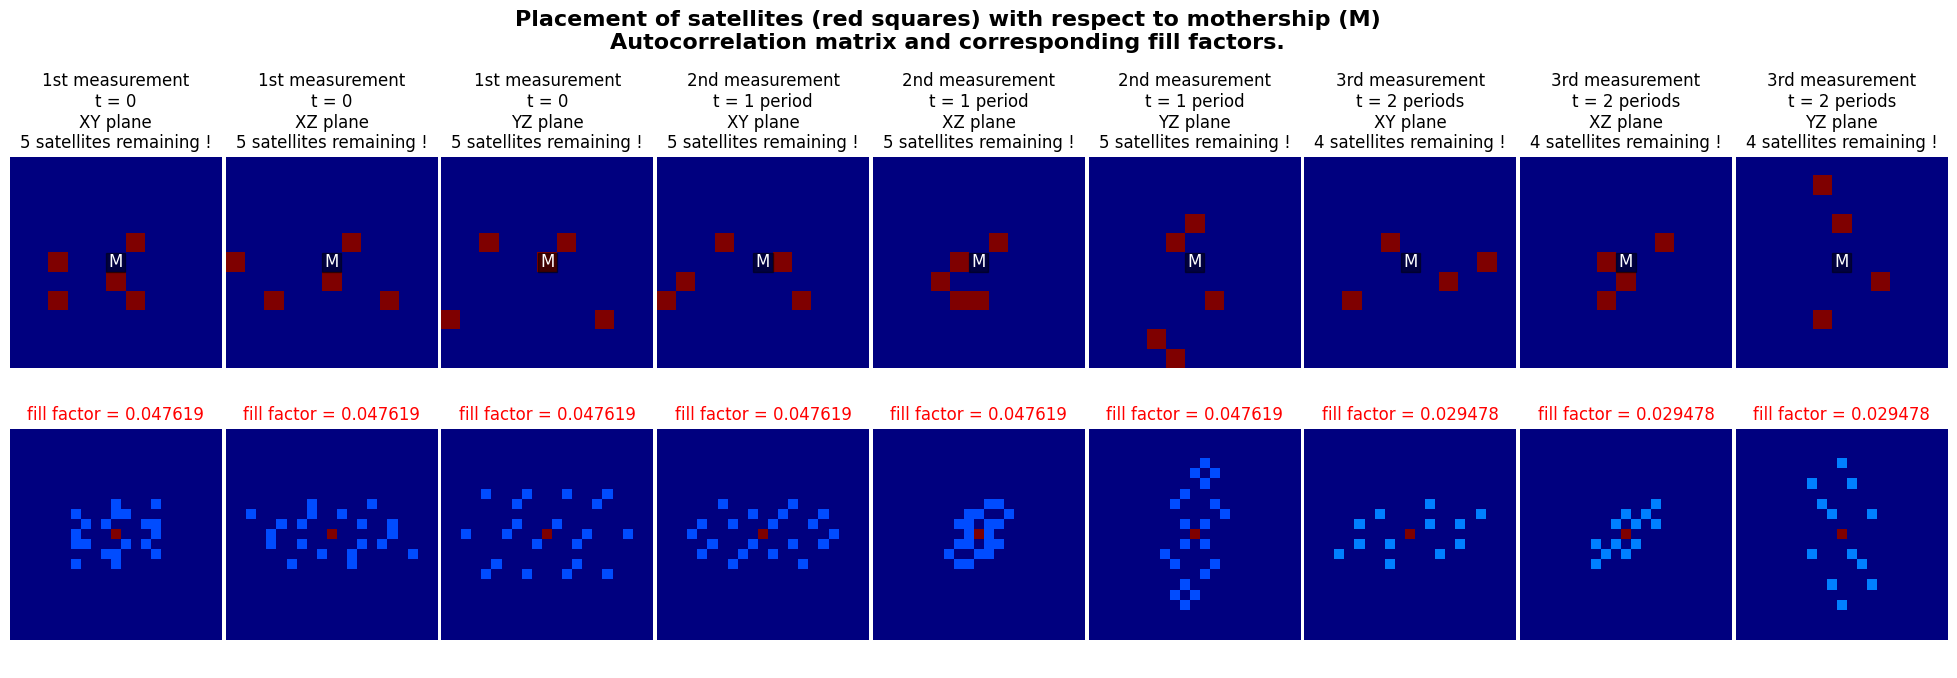

---

XY	SSIM = 11.8238%


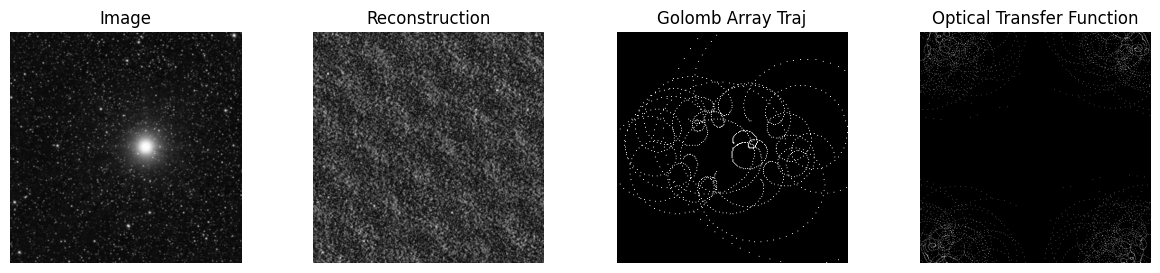

XZ	SSIM = 13.5964%


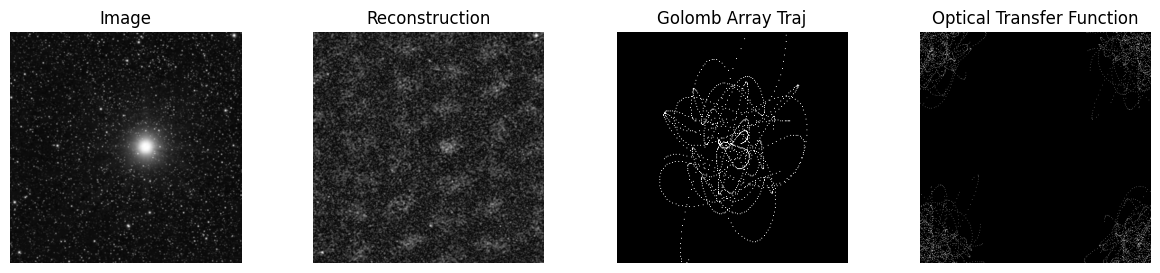

YZ	SSIM = 12.3213%


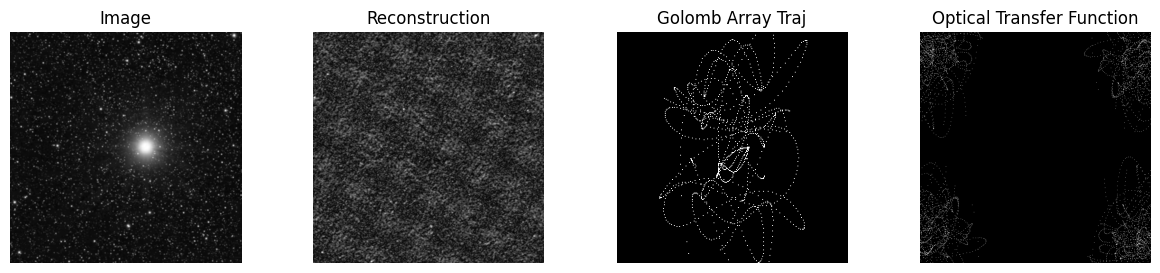

---

XY	SSIM = 11.4193%


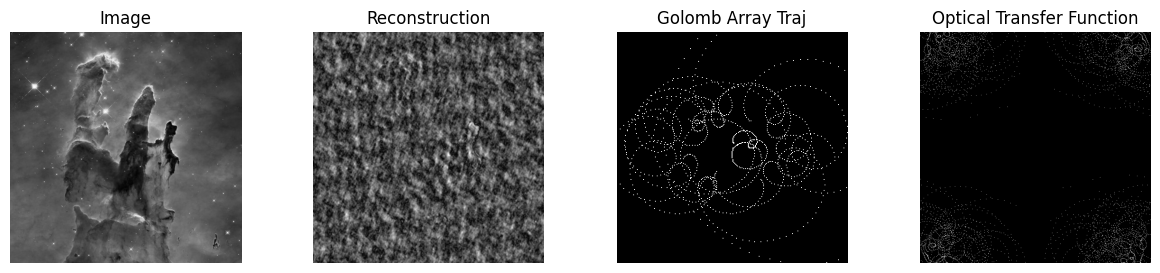

XZ	SSIM = 13.1040%


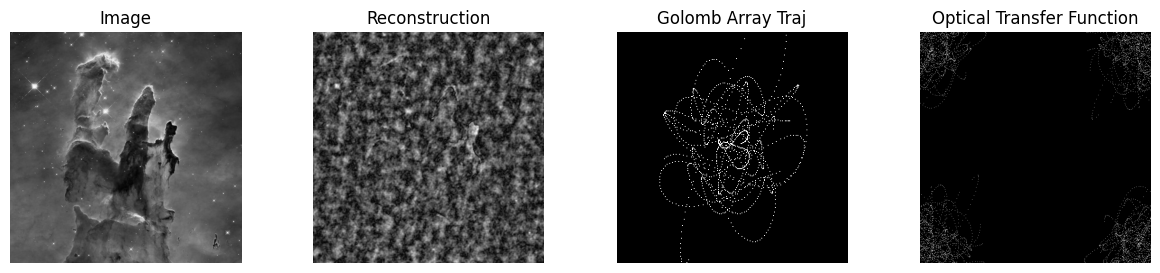

YZ	SSIM = 11.9803%


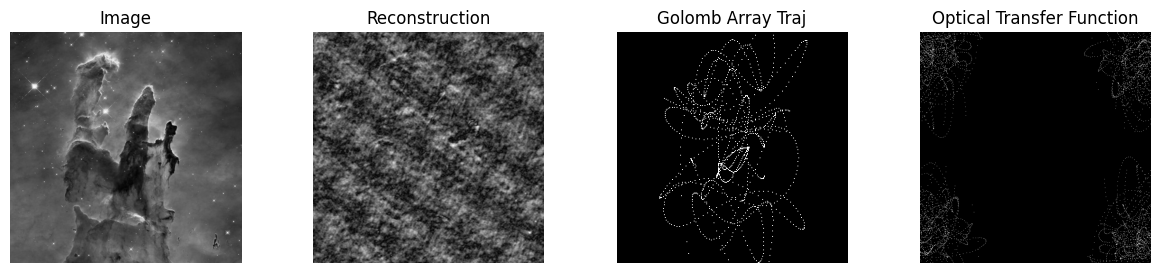

In [100]:
udp = init_simple_problem()

def fitness(udp, x):
        """
        Calcola le fitness:
        - f1, f2, f3: Fattori di riempimento ai tre istanti temporali.
        """
        # Calcola le fitness ai 3 singoli istanti temporali
        fill_factors = udp.fitness_impl(x, plotting=False, return_all_n_meas_fillfactor=True)

        return fill_factors # Restituisce le 3 fitness

udp.fitness= lambda x: fitness(udp,x)
udp.get_nobj=lambda : 3

res = optimize_and_plot(
    problem= pg.problem(udp),
    algo=pg.algorithm(
        pg.nsga2(
            gen=100,
        )
    )
)
del udp, fitness

## Inc mean distances

100%|██████████| 8/8 [08:07<00:00, 60.99s/it]


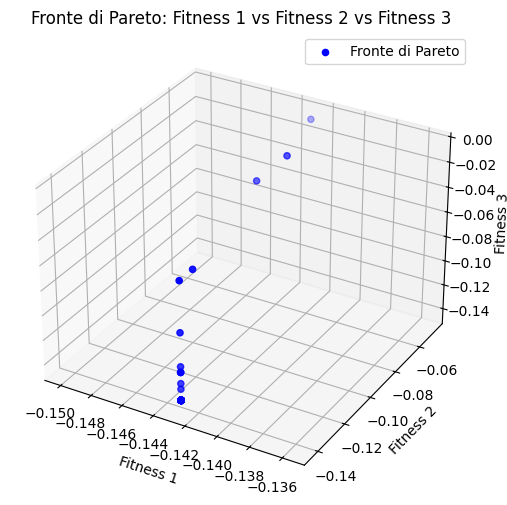

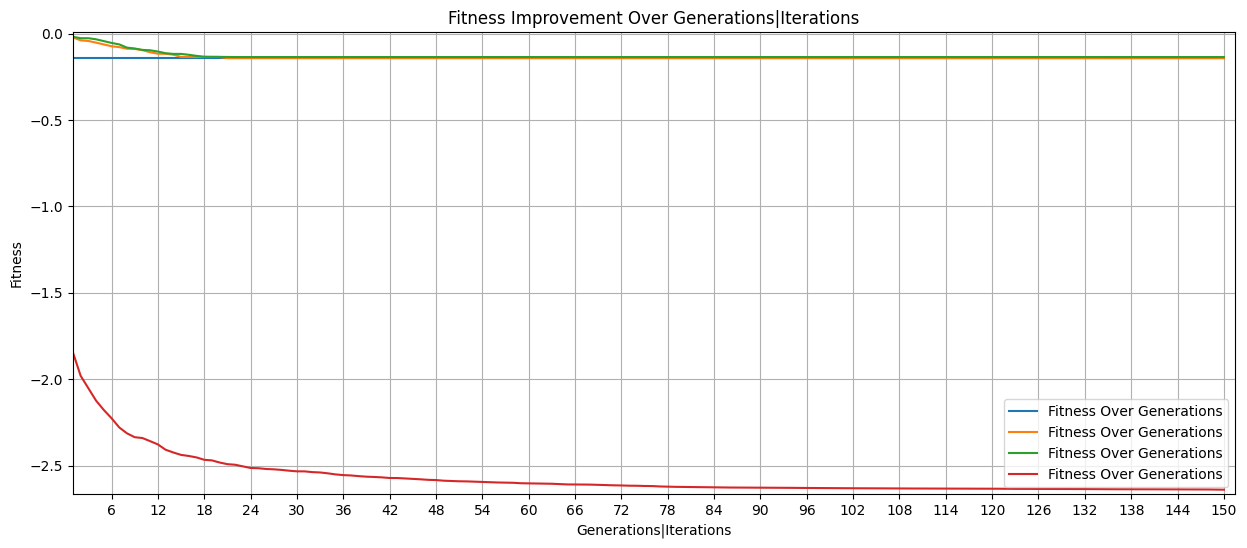

N sat:  5 	Grid size:  11
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -0.1428571	Unique Distances [%]: 51.1111	Satellites in Grid [%]: 93.8889
--- --- ---
Best solution: [ 0.40766689  0.33519829 -0.37948263  0.34502757  0.3701621  -0.19283455
  0.3721268   0.99996218 -0.99988439 -0.05314516  0.49207983  0.95698757
 -0.99983107 -0.99995392 -0.99992513  0.74452117  0.50405239  0.91634617
 -0.99994832  0.99988523  0.99997659  0.80723255 -0.9921016   0.92663428
  0.99969918 -0.99998381  0.99989476  0.87921082 -0.22549746 -0.46312979]
Default Fitness: -0.1428571	Unique Distances [%]: 61.1111	Satellites in Grid [%]: 97.7778


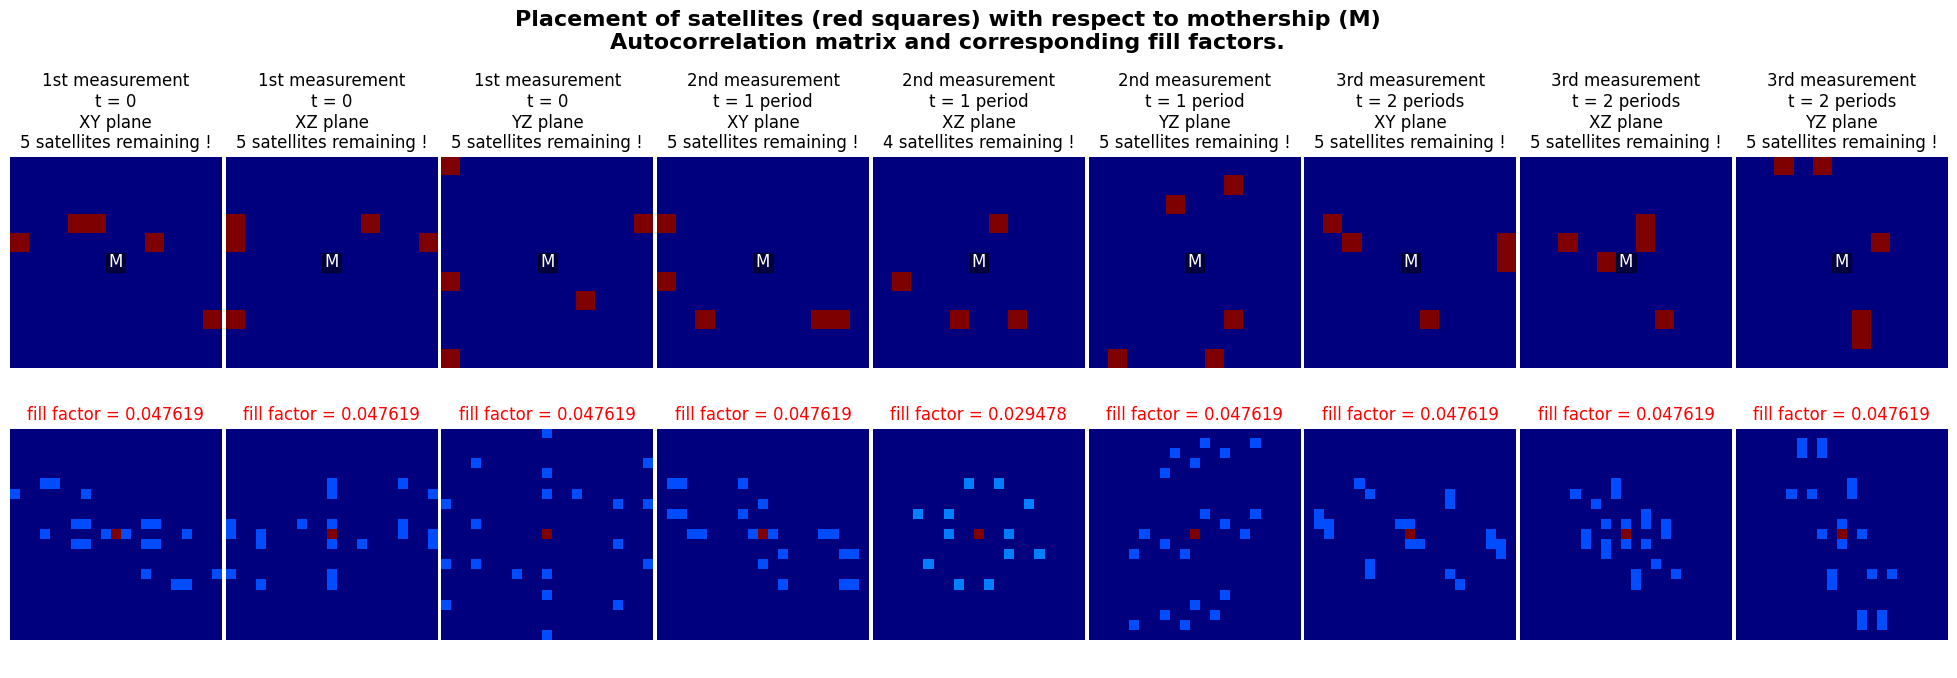

---

XY	SSIM = 10.1133%


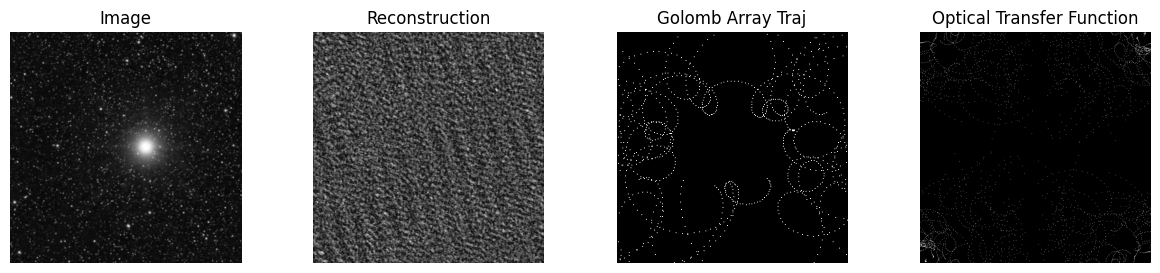

XZ	SSIM = 11.6217%


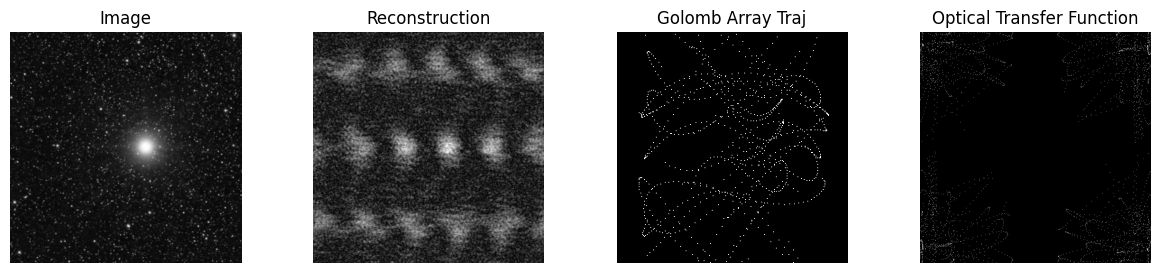

YZ	SSIM = 16.2857%


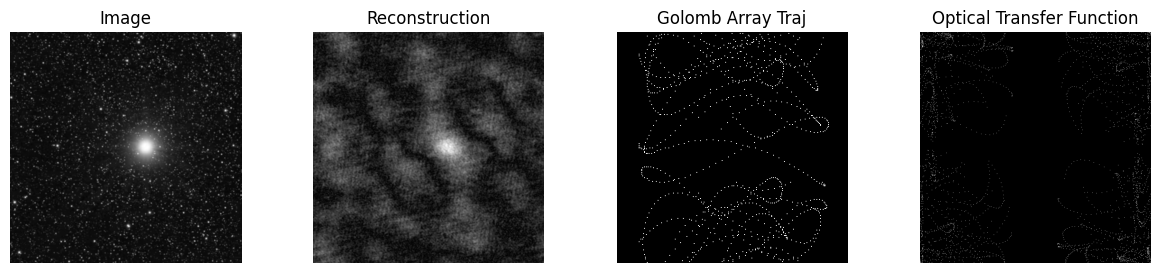

---

XY	SSIM = 10.8662%


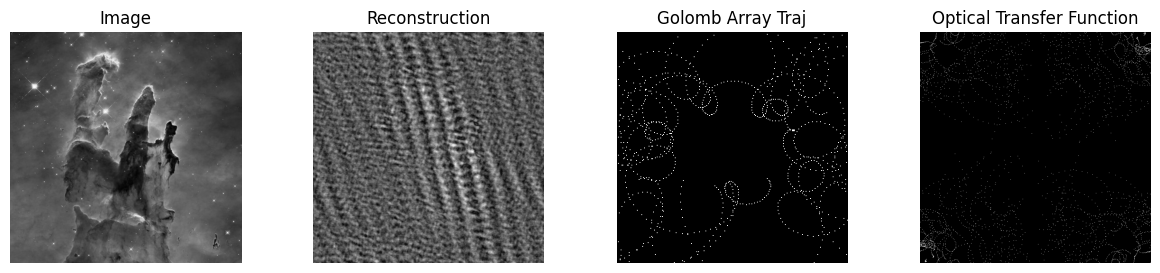

XZ	SSIM = 12.8850%


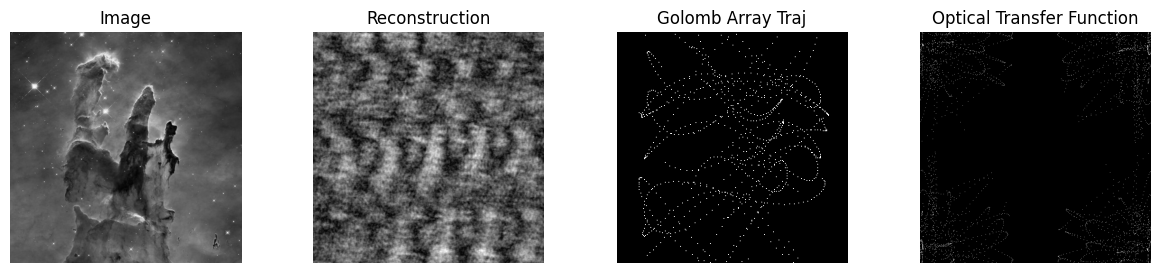

YZ	SSIM = 16.6381%


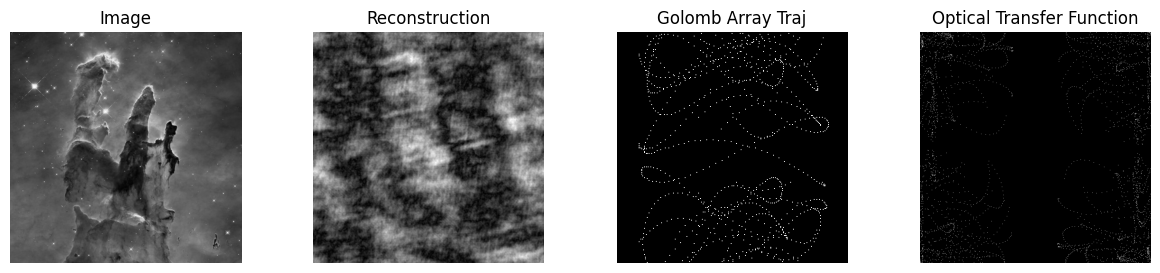

In [103]:
def fitness(udp, x):
    """
    Calcola le fitness:
    - F1, F2, F3: Fattori di riempimento ai tre istanti temporali.
    - F4: Distanza media negativa tra i satelliti.
    """
    # Calcola le fitness ai 3 singoli istanti temporali
    fill_factors = udp.fitness_impl(x, plotting=False, return_all_n_meas_fillfactor=True)

    # Calcola la distanza media negativa tra i satelliti
    positions = np.array(x).reshape(-1, 6)[:, :3]  # Estrae solo le posizioni (x, y, z)
    distances = []
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            dist = np.linalg.norm(positions[i] - positions[j])
            distances.append(dist)
    f4 = -np.mean(distances)  # Distanza media negativa (minimizziamo la dispersione)

    # Restituiamo i 4 obiettivi
    return fill_factors + [f4]

udp.fitness = lambda x: fitness(udp, x)
udp.get_nobj = lambda: 4  # Aggiornato per riflettere il numero di obiettivi

res = optimize_and_plot(
    problem=pg.problem(udp),
    algo=pg.algorithm(
        pg.nsga2(
            gen=get_n_iteration(udp.n_sat),
        )
    )
)

del udp, res


# Medium Problem

### Stock

100%|██████████| 8/8 [27:32<00:00, 206.56s/it]


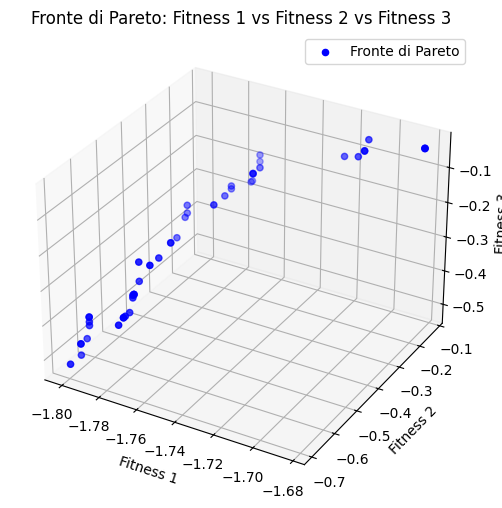

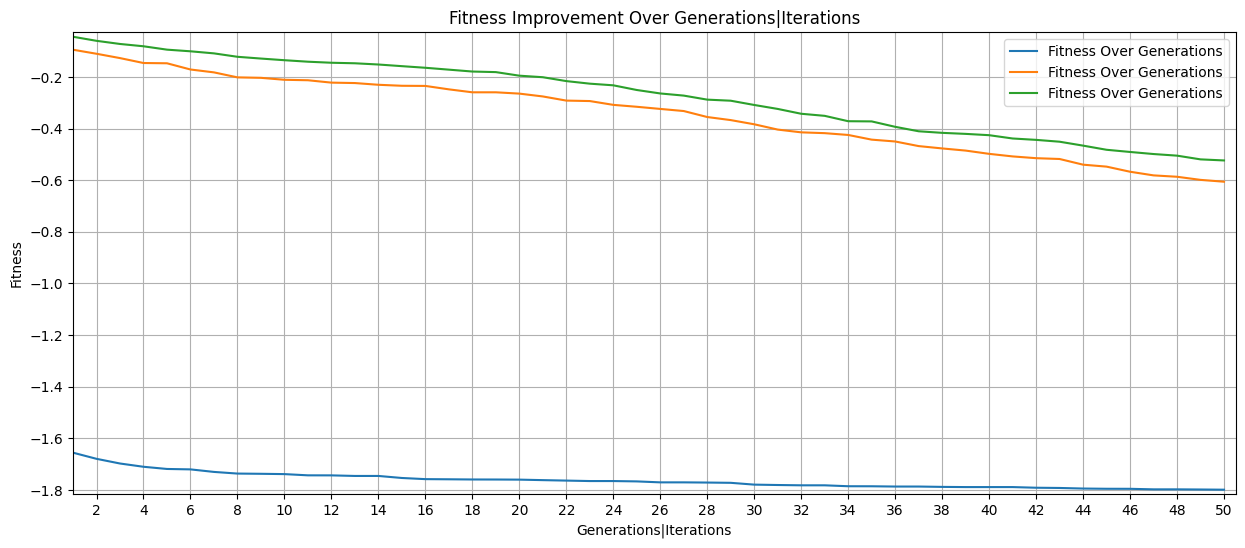

N sat:  40 	Grid size:  21
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -1.4229625	Unique Distances [%]: 0.2564	Satellites in Grid [%]: 60.1389
--- --- ---
Best solution: [ 2.85018479e-01 -2.44676208e-01  1.69484859e-01 -3.27129158e-01
 -2.51415088e-01  8.83529832e-01 -3.18668317e-01  1.34540853e-01
 -1.83926522e-01 -7.37392333e-01 -1.42915342e-04  3.03447312e-01
  5.85545945e-01  2.78290736e-01  3.67061017e-01 -2.46911182e-01
 -5.21589938e-01  6.82602277e-01  2.30843788e-01 -9.34864520e-01
  3.01906161e-01 -2.60582390e-01  9.38606337e-01 -2.68198022e-01
 -6.75376289e-01  3.95405755e-01 -1.41887568e-01 -8.72725281e-01
  8.93373442e-01 -3.22219981e-01 -3.95348505e-01 -1.87124169e-01
 -9.02797123e-01 -2.51604000e-01  9.86108591e-01 -2.23934095e-01
 -9.51106520e-02  4.84734783e-01 -9.08272404e-01  7.16186341e-02
 -9.27669679e-01 -9.94332839e-01 -4.97137925e-01  6.60753382e-01
  9.58849262e-01  1.82144645e-01  8.70829393e-01 -6.77334280e-01
  8.57292494e-01  6.66795965e-0

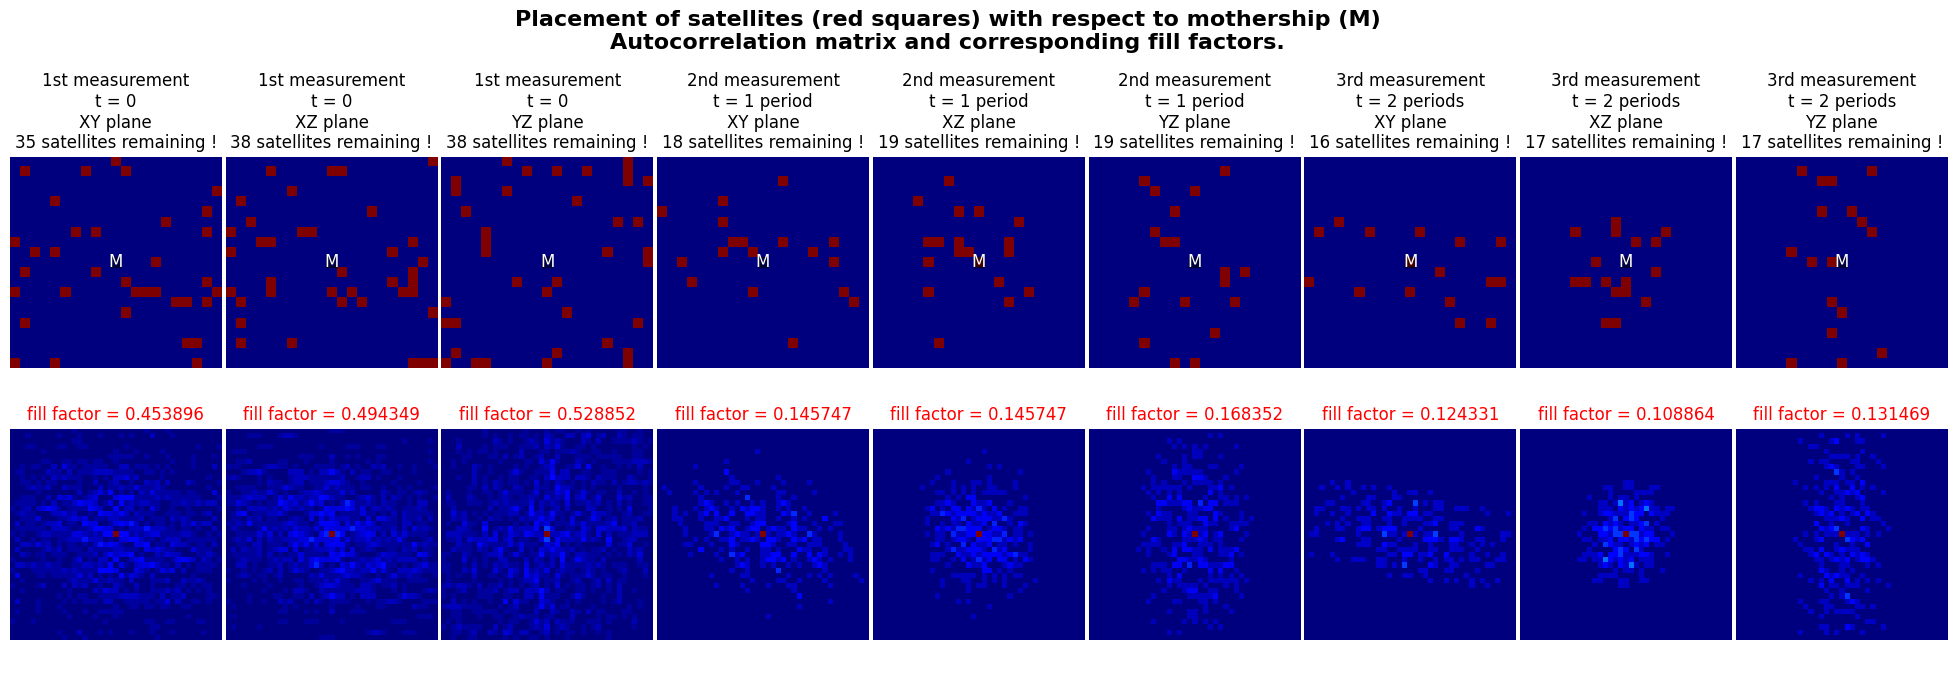

---

XY	SSIM = 82.6874%


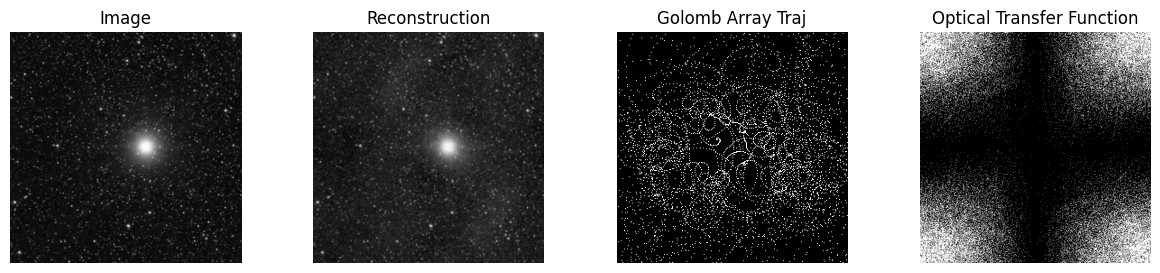

XZ	SSIM = 84.0273%


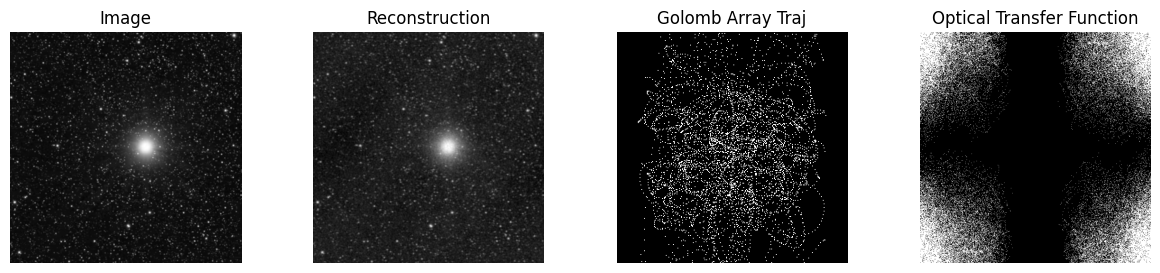

YZ	SSIM = 83.3897%


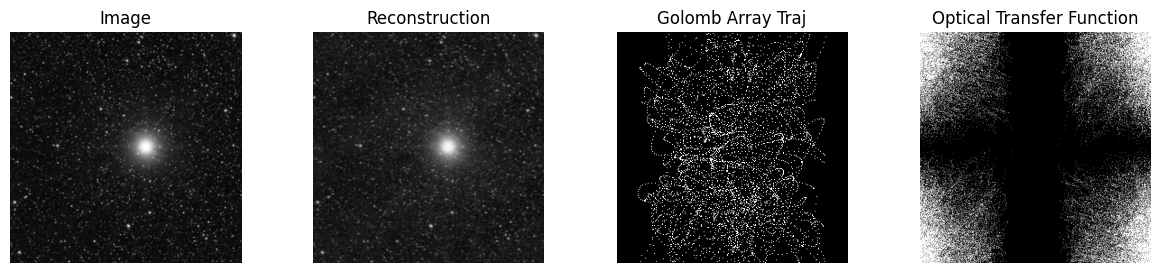

---

XY	SSIM = 85.8947%


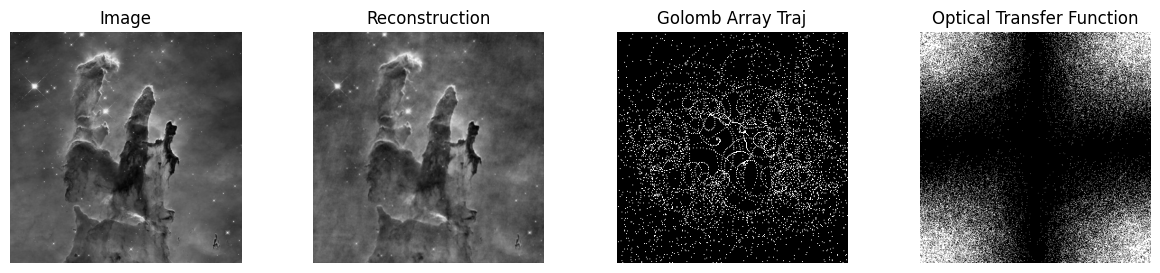

XZ	SSIM = 88.6192%


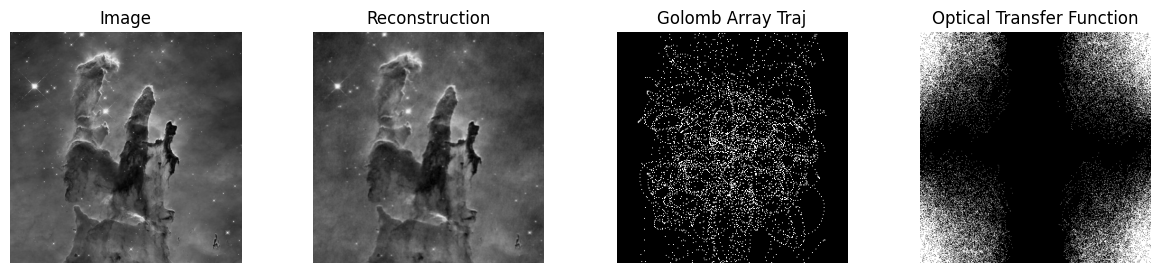

YZ	SSIM = 87.7186%


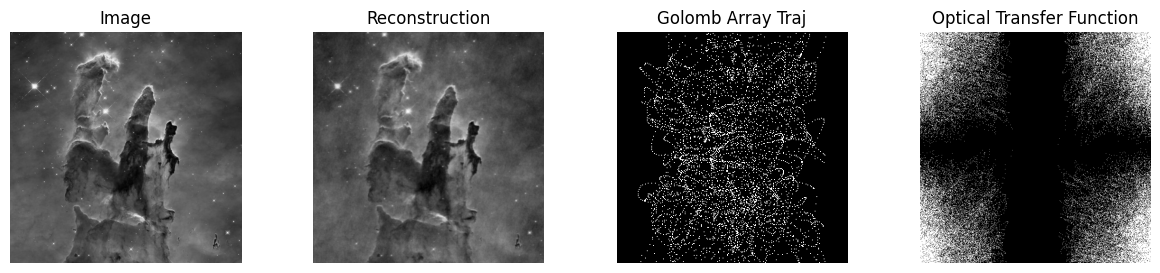

In [104]:
udp = init_medium_problem()

def fitness(udp, x):
        """
        Calcola le fitness:
        - f1, f2, f3: Fattori di riempimento ai tre istanti temporali.
        """
        # Calcola le fitness ai 3 singoli istanti temporali
        fill_factors = udp.fitness_impl(x, plotting=False, return_all_n_meas_fillfactor=True)

        return fill_factors # Restituisce le 3 fitness

udp.fitness= lambda x: fitness(udp,x)
udp.get_nobj=lambda : 3

res = optimize_and_plot(
    problem= pg.problem(udp),
    algo=pg.algorithm(
        pg.nsga2(
            gen=100,
        )
    )
)
del udp, fitness

### Forzato

100%|██████████| 2/2 [14:02<00:00, 421.34s/it]


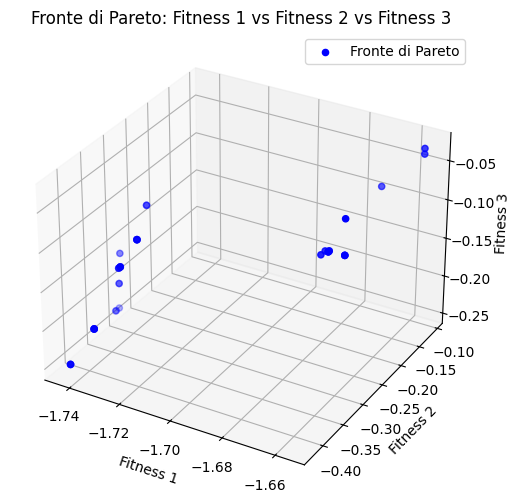

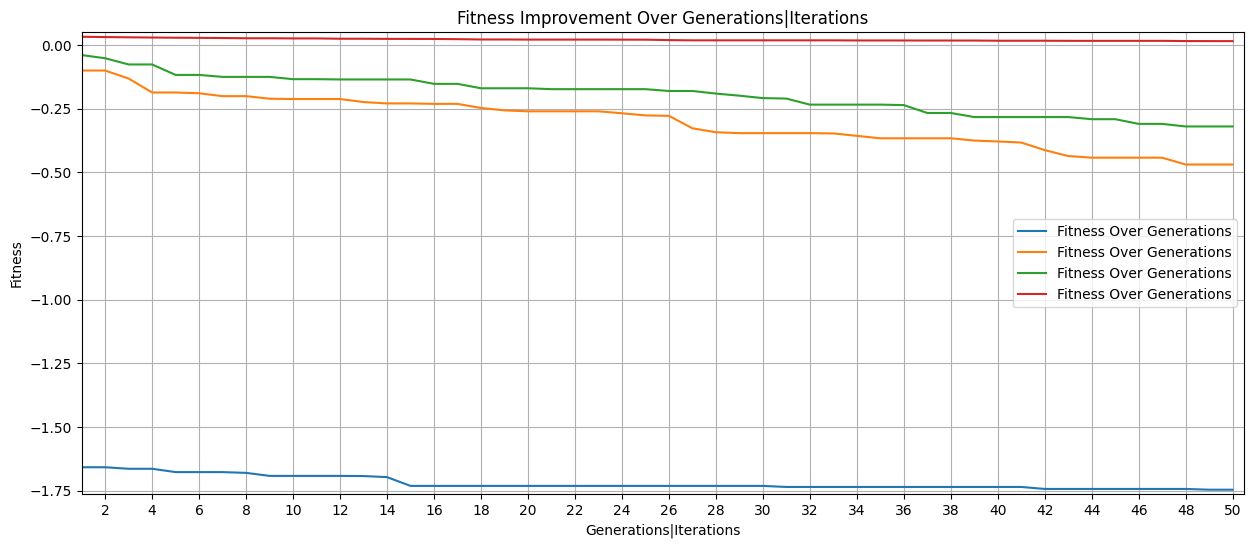

N sat:  40 	Grid size:  21
LOG:
fitness:	[-0.84652, -0.754908]
distances:	[0.0187, 0.0214]
sats:	[0.3389, 0.3778]
--- --- ---
**Score is mean of 2 iterations**
Default Fitness: -0.8007139	Unique Distances [%]: 2.0014	Satellites in Grid [%]: 35.8333
--- --- ---
Best solution: [-0.33961098  0.3014545   0.44354176 -0.34281465  0.12289444  0.32537697
  0.4096321   0.06127386 -0.07644543 -0.18924328 -0.02725677  0.29490673
 -0.09368858 -0.17912129  0.38955836  0.28981181 -0.25665932 -0.53265169
 -0.37147002  0.08398301  0.110989    0.33598664  0.06926296 -0.15187447
 -0.15241065  0.22443078  0.39400479 -0.29419128 -0.0767689  -0.30077168
  0.35260392 -0.39906038 -0.27347238  0.25766651 -0.03580681  0.18144332
  0.09566604  0.06878564 -0.25030132  0.22400777 -0.14218095  0.02463841
  0.29374628 -0.67145323  0.57845388  0.55578293  0.60538882 -0.06268865
  0.5569074  -0.3744806   0.39213396  0.81696257  0.18263298  0.87835546
 -0.52665507  0.49215436  0.63412864 -0.26151752  0.25093071  0.739

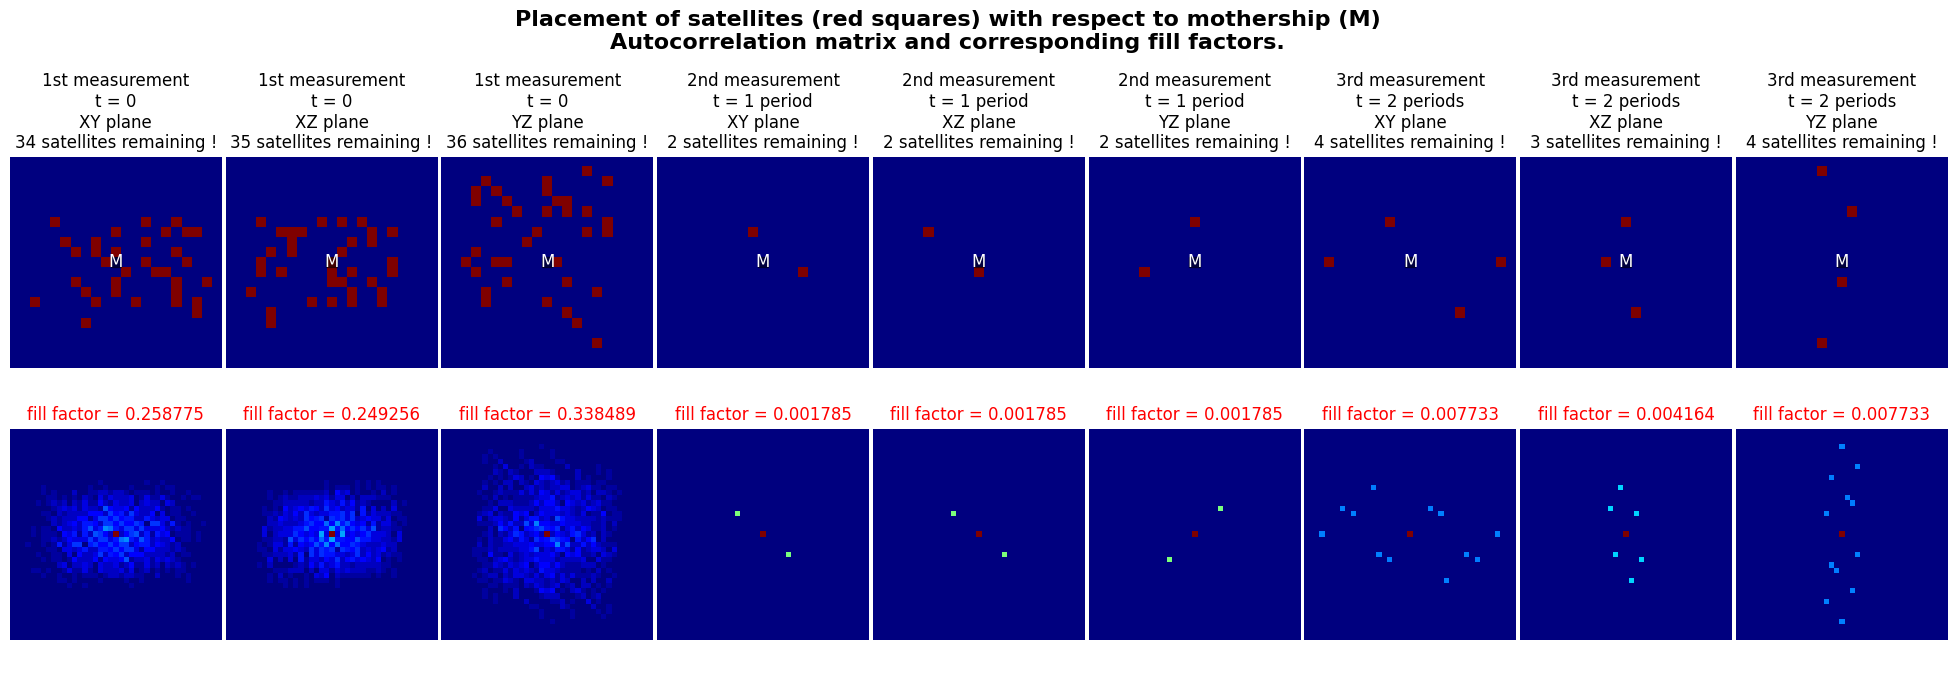

---

XY	SSIM = 76.3480%


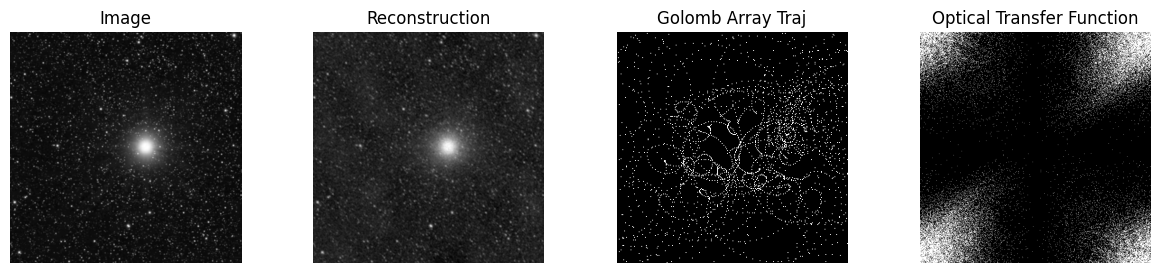

XZ	SSIM = 78.5327%


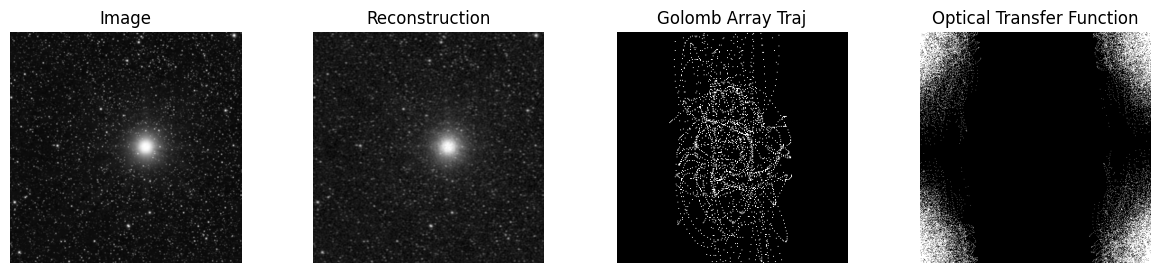

YZ	SSIM = 77.4547%


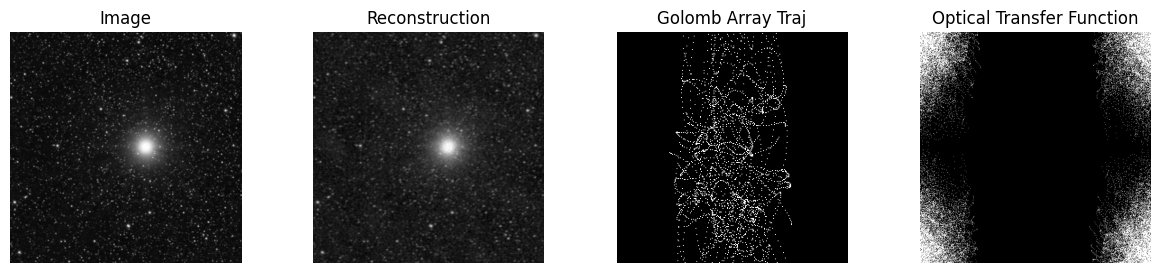

---

XY	SSIM = 83.3280%


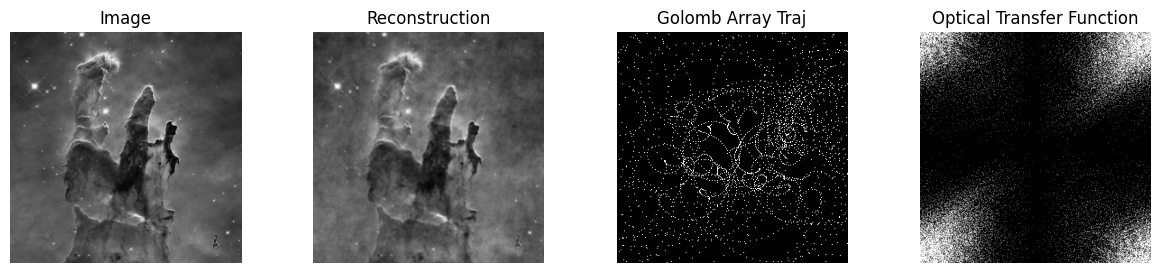

XZ	SSIM = 85.3504%


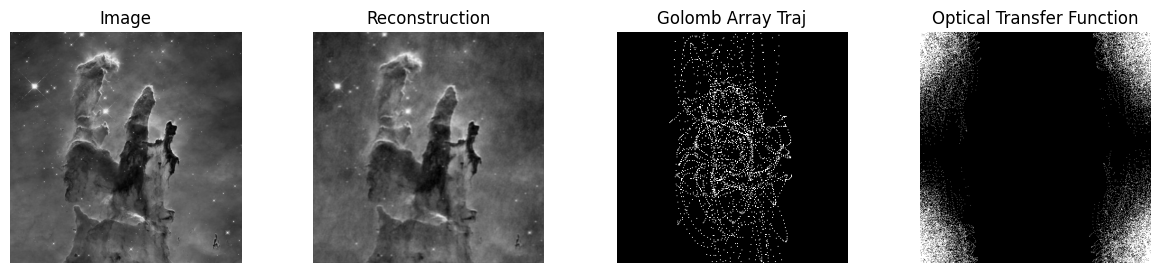

YZ	SSIM = 85.3958%


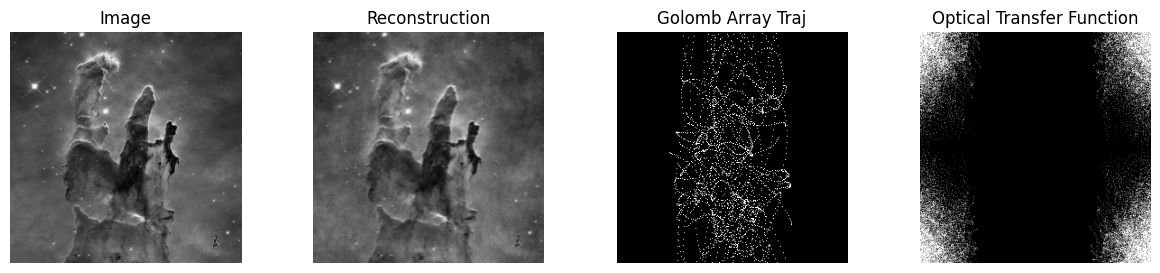

In [9]:
udp = init_medium_problem()
N_ITERATION = 2
def fitness(udp, x):
        """
        Calcola le fitness:
        - f1, f2, f3: Fattori di riempimento ai tre istanti temporali.
        """
        # Calcola le fitness ai 3 singoli istanti temporali
        fitness_value = udp.fitness_impl(x, plotting=False, return_all_n_meas_fillfactor=True)
        distance, _ = compute_unique_distances_and_sats_in_grid(udp=udp, solution=x)
        fitness_value.append(distance)
        return fitness_value # Restituisce le 3 fitness

udp.fitness= lambda x: fitness(udp,x)
udp.get_nobj=lambda : 4

res = optimize_and_plot(
    problem= pg.problem(udp),
    algo=pg.algorithm(
        pg.nsga2(
            gen=100,
        )
    )
)
del udp, fitness